<a href="https://colab.research.google.com/github/AasthaGiri/Week-4-CNN/blob/main/Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical


In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Dataset Path (Google Drive)
dataset_path = '/content/drive/MyDrive/Image dataset'

In [ ]:
# Image preprocessing
image_size = (128, 128)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2,  # 20% of the data will be used for validation
)


In [ ]:
# Training and validation generators
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',  # Specify training set
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',  # Specify validation set
)


Found 816 images belonging to 5 classes.
Found 202 images belonging to 5 classes.


In [ ]:
# --- Base Model 1: Without Pooling, Padding 'valid' ---
model1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='valid', input_shape=(128, 128, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='valid'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax'),
])

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history1 = model1.fit(train_generator, validation_data=validation_generator, epochs=5)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


26/26 ━━━━━━━━━━━━━━━━━━━━ 243s 7s/step - accuracy: 0.3049 - loss: 24.0730 - val_accuracy: 0.5495 - val_loss: 1.1053
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 137s 4s/step - accuracy: 0.7694 - loss: 0.6895 - val_accuracy: 0.6436 - val_loss: 0.9858
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 111s 4s/step - accuracy: 0.9536 - loss: 0.1853 - val_accuracy: 0.6287 - val_loss: 1.3010
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 142s 4s/step - accuracy: 0.9807 - loss: 0.0686 - val_accuracy: 0.6436 - val_loss: 1.3049
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 111s 4s/step - accuracy: 1.0000 - loss: 0.0119 - val_accuracy: 0.6287 - val_loss: 1.4419


In [ ]:
# --- Base Model 2: Padding 'same' ---
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax'),
])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history2 = model2.fit(train_generator, validation_data=validation_generator, epochs=5)

Epoch 1/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 122s 5s/step - accuracy: 0.2463 - loss: 20.7412 - val_accuracy: 0.4406 - val_loss: 1.3052
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 140s 4s/step - accuracy: 0.6406 - loss: 0.9315 - val_accuracy: 0.5347 - val_loss: 1.1601
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 146s 5s/step - accuracy: 0.8847 - loss: 0.3411 - val_accuracy: 0.6040 - val_loss: 1.1994
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 136s 4s/step - accuracy: 0.9808 - loss: 0.0858 - val_accuracy: 0.5693 - val_loss: 1.3613
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 143s 5s/step - accuracy: 1.0000 - loss: 0.0300 - val_accuracy: 0.5842 - val_loss: 1.7657


In [ ]:
# --- Base Model 3: Adding Strides ---
model3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', strides=(2, 2), padding='same', input_shape=(128, 128, 3)),
    Conv2D(64, (3, 3), activation='relu', strides=(2, 2), padding='same'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax'),
])

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history3 = model3.fit(train_generator, validation_data=validation_generator, epochs=5)

Epoch 1/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 14s 429ms/step - accuracy: 0.2541 - loss: 2.3847 - val_accuracy: 0.4752 - val_loss: 1.2404
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 358ms/step - accuracy: 0.5657 - loss: 1.0526 - val_accuracy: 0.6188 - val_loss: 0.9653
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 22s 412ms/step - accuracy: 0.7824 - loss: 0.6228 - val_accuracy: 0.6287 - val_loss: 1.0497
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 12s 420ms/step - accuracy: 0.8550 - loss: 0.4466 - val_accuracy: 0.6287 - val_loss: 1.0105
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 19s 374ms/step - accuracy: 0.9414 - loss: 0.2530 - val_accuracy: 0.7079 - val_loss: 0.9056


In [ ]:
# --- Base Model 4: Using MaxPooling2D ---
model4 = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax'),
])

model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history4 = model4.fit(train_generator, validation_data=validation_generator, epochs=5)

Epoch 1/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.2535 - loss: 3.0882 - val_accuracy: 0.3861 - val_loss: 1.3332
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.4889 - loss: 1.1930 - val_accuracy: 0.4851 - val_loss: 1.2808
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.6788 - loss: 0.7864 - val_accuracy: 0.6634 - val_loss: 0.8680
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.8159 - loss: 0.4760 - val_accuracy: 0.6188 - val_loss: 1.0950
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.8918 - loss: 0.3162 - val_accuracy: 0.5990 - val_loss: 1.1009


In [ ]:
# --- Base Model 5: Final Combined Model ---
model5 = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', strides=(2, 2), padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax'),
])

model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history5 = model5.fit(train_generator, validation_data=validation_generator, epochs=5)


Epoch 1/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 22s 732ms/step - accuracy: 0.2776 - loss: 1.5821 - val_accuracy: 0.4950 - val_loss: 1.2060
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 764ms/step - accuracy: 0.5286 - loss: 1.1216 - val_accuracy: 0.6040 - val_loss: 0.9801
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 42s 838ms/step - accuracy: 0.6492 - loss: 0.9224 - val_accuracy: 0.6386 - val_loss: 0.8995
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 39s 747ms/step - accuracy: 0.6517 - loss: 0.8745 - val_accuracy: 0.7030 - val_loss: 0.8014
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 700ms/step - accuracy: 0.7419 - loss: 0.7202 - val_accuracy: 0.6881 - val_loss: 0.7073


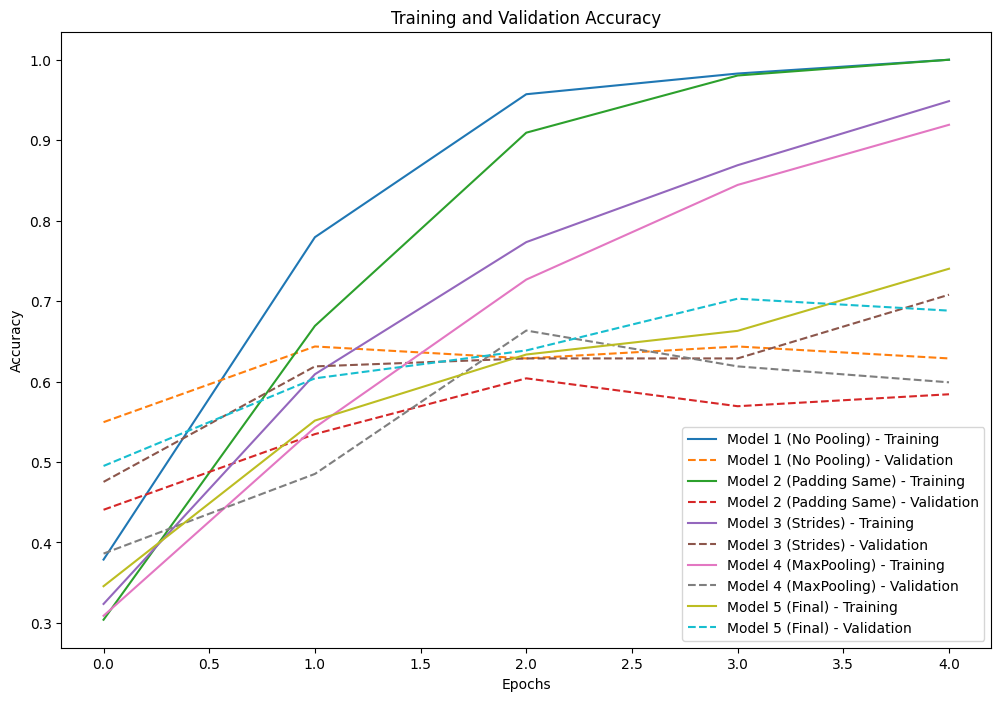

In [ ]:
# --- Plot Training and Validation Accuracy ---
def plot_accuracy(histories, labels):
    plt.figure(figsize=(12, 8))
    for history, label in zip(histories, labels):
        plt.plot(history.history['accuracy'], label=f"{label} - Training")
        plt.plot(history.history['val_accuracy'], linestyle='dashed', label=f"{label} - Validation")
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_accuracy(
    [history1, history2, history3, history4, history5],
    ['Model 1 (No Pooling)', 'Model 2 (Padding Same)', 'Model 3 (Strides)', 'Model 4 (MaxPooling)', 'Model 5 (Final)']
)

In [ ]:
# --- MNIST Dataset Experiments ---
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape and normalize data
X_train = X_train.reshape((60000, 28, 28, 1)) / 255.0
X_test = X_test.reshape((10000, 28, 28, 1)) / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Define MNIST Model
mnist_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax'),
])

mnist_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train MNIST Model
mnist_history = mnist_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 29ms/step - accuracy: 0.9134 - loss: 0.2920 - val_accuracy: 0.9840 - val_loss: 0.0487
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9867 - loss: 0.0428 - val_accuracy: 0.9862 - val_loss: 0.0414
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9907 - loss: 0.0287 - val_accuracy: 0.9904 - val_loss: 0.0268
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9940 - loss: 0.0195 - val_accuracy: 0.9906 - val_loss: 0.0301
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9953 - loss: 0.0152 - val_accuracy: 0.9878 - val_loss: 0.0446


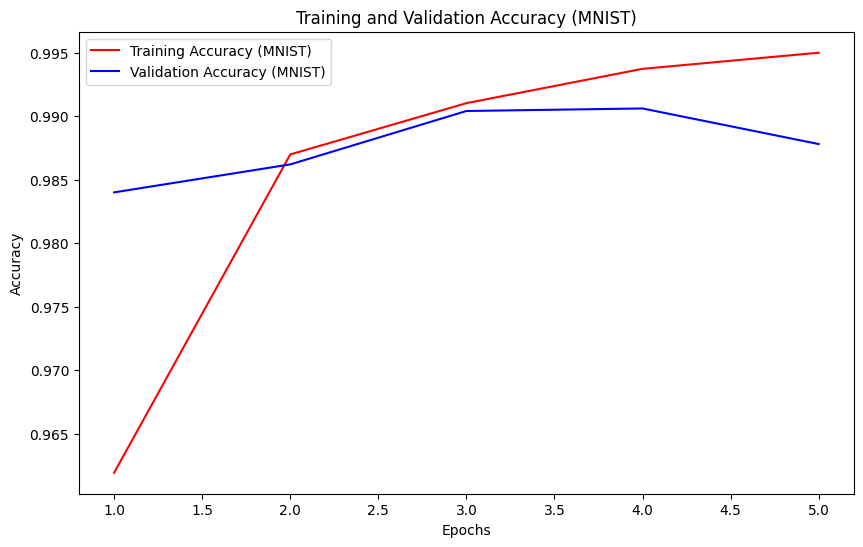

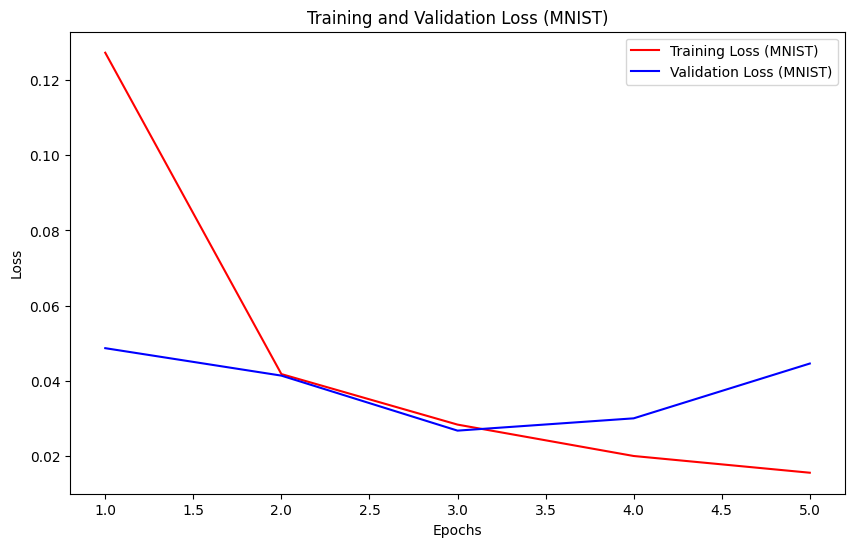

Experimentation completed successfully!


In [ ]:
# Visualize MNIST Results
mnist_history_dict = mnist_history.history
acc = mnist_history_dict['accuracy']
val_acc = mnist_history_dict['val_accuracy']
loss = mnist_history_dict['loss']
val_loss = mnist_history_dict['val_loss']

epochs = range(1, len(acc) + 1)
plt.figure(figsize=(10, 6))
plt.plot(epochs, acc, 'r', label='Training Accuracy (MNIST)')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy (MNIST)')
plt.title('Training and Validation Accuracy (MNIST)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'r', label='Training Loss (MNIST)')
plt.plot(epochs, val_loss, 'b', label='Validation Loss (MNIST)')
plt.title('Training and Validation Loss (MNIST)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("Experimentation completed successfully!")